## Capstone II: Worldwide Crop Production
**Food insecurities have been a constant problem and will continue to be an issue for the years ahead. We want to be able to analyze to projected crop production in this dataset to help guide the design and planning of tangible strategies to address the challenges of future food shortages in the next 9 years as population growth is also anticipated to follow a positive linear path (Crop production relative to natural rate of population growth is not analysize here).**

**Key Data Source:**

OECD-FAO Agricultural Outlook 2020-2029:
https://stats.oecd.org/viewhtml.aspx?datasetcode=HIGH_AGLINK_2020&lang=en)

OECD (2020), Crop production (indicator). doi: 10.1787/49a4e677-en (Accessed on 17 December 2020)


## Step 1: Import of Needed Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import statsmodels.api as sm 
import scipy
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline

#import matplotlib.dates as md 

import seaborn as sns
import pandas as pd 
import numpy as np

#import plotly
# set the size of the charts
mpl.rcParams['figure.figsize'] = (15,6) # Set text size of plot label
#mpl.rcParams['font.size'] = 12
#sns.set_context('talk', font_scale=1.2)
#sns.set_theme(style="ticks", palette="muted")

## Step 2: Data Cleansing


In [2]:
# Dataset import from the database and print the first five rows to evaluate the file's
crop_dataframe = pd.read_csv('HIGH_AGLINK_2020.csv', header=0)
# Displaying the first five rows after connecting the file
crop_dataframe.head()

,LOCATION,Country,COMMODITY CODE,Commodity,Crop Classification Code,Crop Classification,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,OECD,OECD countries,WT,Wheat,QP,Production,2010,2010,TONNE,Tonnes,3,Thousands,NaN,NaN,274956.33,NaN,NaN
1,OECD,OECD countries,WT,Wheat,QP,Production,2011,2011,TONNE,Tonnes,3,Thousands,NaN,NaN,278219.85,NaN,NaN
2,OECD,OECD countries,WT,Wheat,QP,Production,2012,2012,TONNE,Tonnes,3,Thousands,NaN,NaN,272926.98,NaN,NaN
3,OECD,OECD countries,WT,Wheat,QP,Production,2013,2013,TONNE,Tonnes,3,Thousands,NaN,NaN,294195.01,NaN,NaN
4,OECD,OECD countries,WT,Wheat,QP,Production,2014,2014,TONNE,Tonnes,3,Thousands,NaN,NaN,292229.21,NaN,NaN


In [3]:
# A look at the last five rows of the file
crop_dataframe.tail()

,LOCATION,Country,COMMODITY CODE,Commodity,Crop Classification Code,Crop Classification,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
104784,LAC,LATIN AMERICA,SCA,Sugar cane,BF,Biofuel use,2025,2025,TONNE,Tonnes,3,Thousands,NaN,NaN,450792.84,NaN,NaN
104785,LAC,LATIN AMERICA,SCA,Sugar cane,BF,Biofuel use,2026,2026,TONNE,Tonnes,3,Thousands,NaN,NaN,457266.41,NaN,NaN
104786,LAC,LATIN AMERICA,SCA,Sugar cane,BF,Biofuel use,2027,2027,TONNE,Tonnes,3,Thousands,NaN,NaN,462746.95,NaN,NaN
104787,LAC,LATIN AMERICA,SCA,Sugar cane,BF,Biofuel use,2028,2028,TONNE,Tonnes,3,Thousands,NaN,NaN,468879.20,NaN,NaN
104788,LAC,LATIN AMERICA,SCA,Sugar cane,BF,Biofuel use,2029,2029,TONNE,Tonnes,3,Thousands,NaN,NaN,474476.59,NaN,NaN


In [4]:
# A look at a summary of the dataset for an overview of the file content
print('Overview of the file content') 
print(crop_dataframe.info())

Overview of the file content
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104789 entries, 0 to 104788
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LOCATION                  104789 non-null  object 
 1   Country                   104789 non-null  object 
 2   COMMODITY CODE            104789 non-null  object 
 3   Commodity                 104789 non-null  object 
 4   Crop Classification Code  104789 non-null  object 
 5   Crop Classification       104789 non-null  object 
 6   TIME                      104789 non-null  int64  
 7   Time                      104789 non-null  int64  
 8   Unit Code                 104109 non-null  object 
 9   Unit                      104109 non-null  object 
 10  PowerCode Code            104789 non-null  int64  
 11  PowerCode                 104789 non-null  object 
 12  Reference Period Code     0 non-null       float64
 13  Reference Perio

In [5]:
# Statistical Summary of the dataset
print('Statistical Summary of the dataset') 
print(crop_dataframe.describe().T)

Statistical Summary of the dataset
                          count           mean           std       min  \
TIME                   104789.0    2019.499575  5.766262e+00  2010.000   
Time                   104789.0    2019.499575  5.766262e+00  2010.000   
PowerCode Code         104789.0       2.609501  1.387801e+00     0.000   
Reference Period Code       0.0            NaN           NaN       NaN   
Reference Period            0.0            NaN           NaN       NaN   
Value                  104789.0  282843.605430  4.349511e+06   -13.974   
Flag Codes                  0.0            NaN           NaN       NaN   
Flags                       0.0            NaN           NaN       NaN   

                             25%         50%       75%          max  
TIME                   2014.0000  2019.00000  2024.000       2029.0  
Time                   2014.0000  2019.00000  2024.000       2029.0  
PowerCode Code            3.0000     3.00000     3.000          6.0  
Reference Period C

In [6]:
# Convert the Time period of the forecast from integer to object
crop_dataframe['Time'] = crop_dataframe['Time'].astype(int).astype(str)
# Remove duplicate columns not needed for this analysis
dupcol_todrop = ['LOCATION', 'TIME', 'Unit Code', 'PowerCode Code', 'PowerCode'] 
crop_dataframe.drop(dupcol_todrop, inplace=True, axis=1)
crop_dataframe.head()

,Country,COMMODITY CODE,Commodity,Crop Classification Code,Crop Classification,Time,Unit,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,OECD countries,WT,Wheat,QP,Production,2010,Tonnes,NaN,NaN,274956.33,NaN,NaN
1,OECD countries,WT,Wheat,QP,Production,2011,Tonnes,NaN,NaN,278219.85,NaN,NaN
2,OECD countries,WT,Wheat,QP,Production,2012,Tonnes,NaN,NaN,272926.98,NaN,NaN
3,OECD countries,WT,Wheat,QP,Production,2013,Tonnes,NaN,NaN,294195.01,NaN,NaN
4,OECD countries,WT,Wheat,QP,Production,2014,Tonnes,NaN,NaN,292229.21,NaN,NaN


In [7]:
# Check for the percent of missing data in each columns that is not going to be useful
for column in crop_dataframe.columns:
    pct_missing = np.mean(crop_dataframe[column].isnull()) 
    print('{} - {}%'.format(column, round(pct_missing*100)))

Country - 0%
COMMODITY CODE - 0%
Commodity - 0%
Crop Classification Code - 0%
Crop Classification - 0%
Time - 0%
Unit - 1%
Reference Period Code - 100%
Reference Period - 100%
Value - 0%
Flag Codes - 100%
Flags - 100%


In [8]:
# The columns with 100% Null values are removed from the dataset for the purpose this analysis
columns_todrop= ['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'] 
crop_dataframe.drop(columns_todrop, inplace=True, axis=1) 
crop_dataframe.head()

,Country,COMMODITY CODE,Commodity,Crop Classification Code,Crop Classification,Time,Unit,Value
0,OECD countries,WT,Wheat,QP,Production,2010,Tonnes,274956.33
1,OECD countries,WT,Wheat,QP,Production,2011,Tonnes,278219.85
2,OECD countries,WT,Wheat,QP,Production,2012,Tonnes,272926.98
3,OECD countries,WT,Wheat,QP,Production,2013,Tonnes,294195.01
4,OECD countries,WT,Wheat,QP,Production,2014,Tonnes,292229.21


In [9]:
# Cleaning the column headers to make easy to work with
crop_dataframe.columns = crop_dataframe.columns.str.strip().str.lower().str.replace(' ', '_')
crop_dataframe.head()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
0,OECD countries,WT,Wheat,QP,Production,2010,Tonnes,274956.33
1,OECD countries,WT,Wheat,QP,Production,2011,Tonnes,278219.85
2,OECD countries,WT,Wheat,QP,Production,2012,Tonnes,272926.98
3,OECD countries,WT,Wheat,QP,Production,2013,Tonnes,294195.01
4,OECD countries,WT,Wheat,QP,Production,2014,Tonnes,292229.21


In [10]:
# removal of the OECD countries and world since the values are running totals of all countries crop productions
crop_dataframe = crop_dataframe[crop_dataframe.country != 'OECD countries']
crop_dataframe = crop_dataframe[crop_dataframe.country != 'WORLD'] 
#Print first 5 rows to validate removale of OECD Countries values 
crop_dataframe.head()
# Print last 5 rows to validate removale of WORLD values 
#crop_dataframe.tail()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
180,Turkey,WT,Wheat,QP,Production,2010,Tonnes,19674.0
181,Turkey,WT,Wheat,QP,Production,2011,Tonnes,21800.0
182,Turkey,WT,Wheat,QP,Production,2012,Tonnes,20100.0
183,Turkey,WT,Wheat,QP,Production,2013,Tonnes,22050.0
184,Turkey,WT,Wheat,QP,Production,2014,Tonnes,19000.0


## Step 3: Exploratory Analysis


The OEDC-FAO Agricultural Outlook 2020-2029 dataset contain all OEDC countries's the commodity types that are featured in global trade. Prior ten years productions vaules are also included in this analysis to provide historical context to evalute the forecast from 2020 to 2029.

The exploratory analysis is centered on the worldwide crop production (included in dataset are:COTTON, Maize, PULSES, Other coarse grains, ROOTS AND TUBERS, Raw sugar, Rice, Soybean, Sugar beet, Wheat).

### 3.1 Descriptive Statistics of the Global Commodity Production Forecast

In [11]:
# Filtering the data to extract crop productions only
crop_list = ['COTTON', 'Maize', 'PULSES', 'Other coarse grains', 'ROOTS AND TUBERS', 'Sugar can', 'Rice', 'Soybean','Sugar beet', 'Wheat'] 
crop_dataframe = crop_dataframe.loc[crop_dataframe['commodity'].isin(crop_list)] 
crop_dataframe.head()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
180,Turkey,WT,Wheat,QP,Production,2010,Tonnes,19674.0
181,Turkey,WT,Wheat,QP,Production,2011,Tonnes,21800.0
182,Turkey,WT,Wheat,QP,Production,2012,Tonnes,20100.0
183,Turkey,WT,Wheat,QP,Production,2013,Tonnes,22050.0
184,Turkey,WT,Wheat,QP,Production,2014,Tonnes,19000.0


In [12]:
# Filtering the data to remove the variable such as yield per acreage that are not relevant to this analysis
subclass_list = ['Consumption', 'Exports', 'Food', 'Imports', 'Production', 'Other use']
crop_dataframe = crop_dataframe.loc[crop_dataframe['crop_classification'].isin(subclass_list)] 
crop_dataframe.tail()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
104224,NORTH AMERICA,MA,Maize,OU,Other use,2025,Tonnes,4206.2195
104225,NORTH AMERICA,MA,Maize,OU,Other use,2026,Tonnes,3630.9718
104226,NORTH AMERICA,MA,Maize,OU,Other use,2027,Tonnes,2761.4367
104227,NORTH AMERICA,MA,Maize,OU,Other use,2028,Tonnes,2123.3584
104228,NORTH AMERICA,MA,Maize,OU,Other use,2029,Tonnes,1399.2053


In [13]:
# Summary of the dataset after cleansing the file of duplicate columns and missing values
print('Summary of the dataset after cleansing the file:') 
print(crop_dataframe.info())

Summary of the dataset after cleansing the file:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14280 entries, 180 to 104228
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   14280 non-null  object 
 1   commodity_code            14280 non-null  object 
 2   commodity                 14280 non-null  object 
 3   crop_classification_code  14280 non-null  object 
 4   crop_classification       14280 non-null  object 
 5   time                      14280 non-null  object 
 6   unit                      14280 non-null  object 
 7   value                     14280 non-null  float64
dtypes: float64(1), object(7)
memory usage: 1004.1+ KB
None


In [14]:
# Statistical Summary of the dataset
print('Statistical Summary of the dataset') 
print(crop_dataframe.describe().T)

Statistical Summary of the dataset
         count          mean          std  min      25%        50%      75%  \
value  14280.0  17187.838121  54776.93127  0.0  49.8095  1108.6828  7819.05   

             max  
value  530240.76  


In [15]:
# Statistical Summary of the dataset
print('Statistical Summary of the dataset') 
print(crop_dataframe.describe().T)

Statistical Summary of the dataset
         count          mean          std  min      25%        50%      75%  \
value  14280.0  17187.838121  54776.93127  0.0  49.8095  1108.6828  7819.05   

             max  
value  530240.76  


In [16]:
# Statistical Summary of the crop Classifcation
print(crop_dataframe.groupby('crop_classification').describe().T)

crop_classification    Consumption        Exports           Food  \
value count            2520.000000    2520.000000    1960.000000   
      mean            32455.926257    6885.445769   15298.718595   
      std             80838.564772   16502.364734   48322.781109   
      min                 0.000000       0.000000       0.000000   
      25%               302.609500       2.101750     261.041500   
      50%              3681.226500     320.116000    1269.434000   
      75%             20310.173250    3567.414000    7895.240500   
      max            530240.760000  107180.670000  383811.560000   

crop_classification        Imports     Other use     Production  
value count            2520.000000   2240.000000    2520.000000  
      mean             5356.822162   3962.276428   37278.528320  
      std             15920.084511  10755.333520   83591.167974  
      min                 0.000000      0.000100       0.000000  
      25%                12.227750     13.898547     293.

In [17]:
 # Statistical Summary by country and time period
print(crop_dataframe.groupby(['country', 'time']).describe().T)

country            AFRICA                                            \
time                 2010          2011          2012          2013   
value count     51.000000     51.000000     51.000000     51.000000   
      mean   17062.207774  17485.220633  18228.673663  19520.133581   
      std    22025.509709  22565.575352  23846.995886  25403.958171   
      min        0.000000      0.000000      0.000000      0.000000   
      25%      782.506500    888.835500    984.987000   1041.753500   
      50%     6370.032000   5454.402600   5423.102800   6254.279800   
      75%    25076.830000  27276.136000  28851.486500  30300.299000   
      max    73725.503000  76759.054000  80742.749000  87176.731000   

country                                                              \
time                 2014          2015          2016          2017   
value count     51.000000     51.000000     51.000000     51.000000   
      mean   20163.550677  20455.381319  21165.428095  21543.362175   
     

In [18]:
# Statistical Summary by commodity and time period 
#print(crop_dataframe.groupby('commodity').describe()) 
print(crop_dataframe.groupby(['commodity', 'time']).describe().T)

commodity          COTTON                                            \
time                 2010          2011          2012          2013   
value count     70.000000     70.000000     70.000000     70.000000   
      mean    1107.247277   1130.433706   1154.310691   1108.778349   
      std     3364.564565   3377.904329   3466.796734   3429.952979   
      min        0.000000      0.000000      0.000000      0.000000   
      25%        0.000100      0.000100      0.000100      0.000100   
      50%       14.196000     18.903500     18.132500      7.320500   
      75%      642.055250    502.948750    688.000000    683.565000   
      max    21306.999000  19280.464000  20291.966000  20946.427000   

commodity                                                            \
time                 2014          2015          2016          2017   
value count     70.000000     70.000000     70.000000     70.000000   
      mean    1113.555806   1013.910506   1091.079006   1213.819677   
     

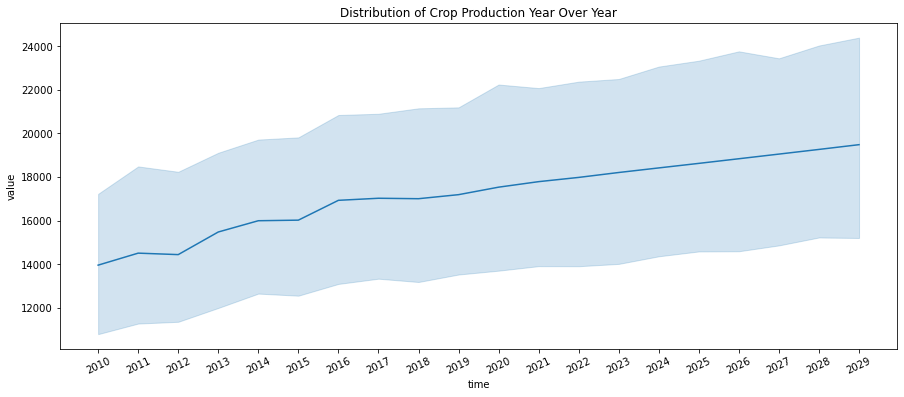

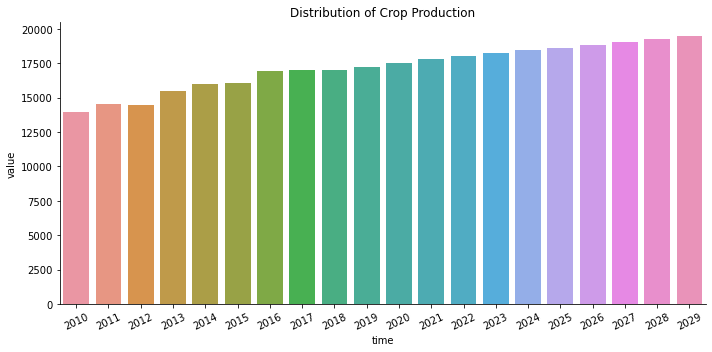

In [19]:
# Checking for the overall distribution of the crop production
plt.figure(figsize=(15, 6))
sns.lineplot(x='time', y='value', data=crop_dataframe) 
plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Distribution of Crop Production Year Over Year') 
labels = plt.xticks(rotation=25)

sns.catplot(x='time', y='value', data=crop_dataframe, kind='bar', ci=None, legend_out=True, aspect=2) 
plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Distribution of Crop Production')
labels = plt.xticks(rotation=25) 
plt.tight_layout()
plt.show()

In [20]:
# Will use the function for a single graph of bar plot
def single_plot(xcolumn, ycolumn): 
    plt.figure(figsize=(15, 6))
    ax_value = sns.barplot(x=xcolumn, y=ycolumn, data= crop_dataframe, ci=None) ## exam #plot_order = crop_dataframe.groupby(xcolumn)[ycolumn].sum().sort_values(ascending=
    #plot_order = crop_dataframe.groupby(xcolumn)[ycolumn].sum().sort_values(ascending=True).index 
    #sns.catplot(data=crop_dataframe, x=xcolumn, y=ycolumn, kind='bar',ci=None, legend=True)
    plt.xlable = xcolumn.name
    plt.ylable = ycolumn.name
    plt.title('Distribution of {}'.format(xcolumn.name)) 
    labels = plt.xticks(rotation=25)
    plt.tight_layout() 
    plt.show()

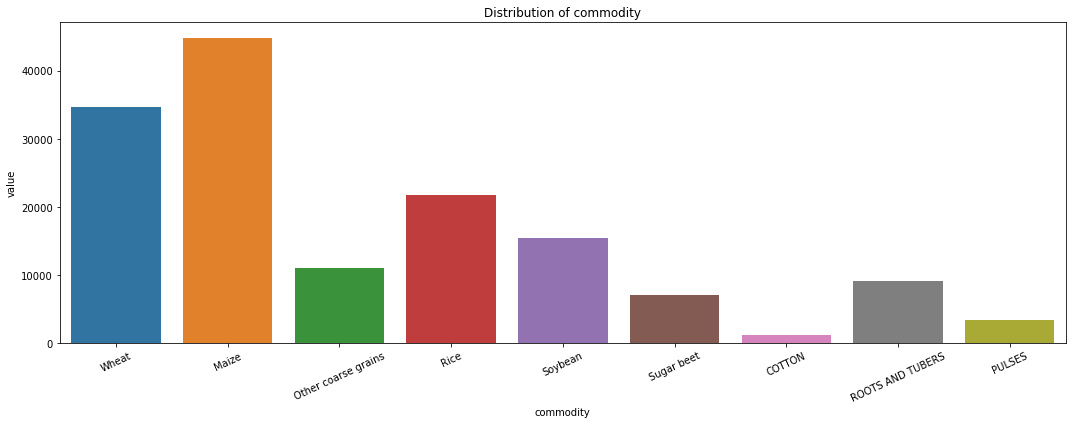

In [21]:
# Want to check the distribution of the commodity data points with a bar graph
single_plot(crop_dataframe['commodity'], crop_dataframe['value'])

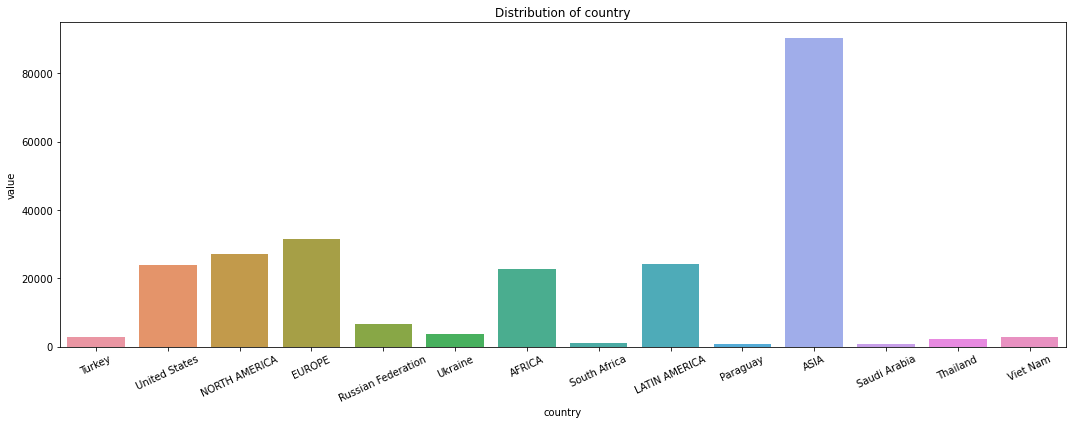

In [22]:
# Want to check the distribution of the country data points with a bar graph
single_plot(crop_dataframe['country'], crop_dataframe['value'])

## 3.2 Checking the Columns Separately to Understand the Distribution of the Data

- Since the task of analysing each column (country, commodity, crop classification) is going to be repeated a few times, functions are utilized to automate the process.

In [23]:
# The two functions will be used to analyze the crop production at different levels
def plotchart(xcolumn, ycolumn, plt_kwargs={}, sct_kwargs={}): 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x=xcolumn, y=ycolumn, orient='v', ax=ax1, data=crop_dataframe, saturation=1) 
    ax1.set_xlable = xcolumn.name
    ax1.set_ylable = ycolumn.name
    ax1.set_title('Boxplot of {}'.format(xcolumn.name))
    labels = ax1.get_xticklabels()
    plt.setp(labels, rotation=25, horizontalalignment='right') 
    #fig.tight_layout()
    
    sns.barplot(x=xcolumn, y=ycolumn, ax=ax2, data=crop_dataframe)  
    ax2.set_xlable = xcolumn.name
    ax2.set_ylable = ycolumn.name
    ax2.set_title('Bar plot of of {}'.format(xcolumn.name))
    labels = ax2.get_xticklabels()
    plt.setp(labels, rotation=25, horizontalalignment='right')
    fig.tight_layout() 
    plt.show()

In [24]:
# Wanted to see another view of the distribution of the data point by superposing two p
def twochartplot_funct(xcolumn, ycolumn): 
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.boxplot(x=xcolumn, y=ycolumn, data=crop_dataframe, ax=ax, palette='Set2', 
                saturation=1, linewidth=2.5, dodge=False) 
    sns.stripplot(x=xcolumn, y=ycolumn, data=crop_dataframe, ax=ax, size=7, 
                  jitter=0.10, palette='tab10')
    
    ax.set_xlabel(xcolumn.name, fontsize=12) 
    ax.set_ylabel(ycolumn.name, fontsize=12)
    ax.set_title('plot of '+ xcolumn.name + ' and ' + ycolumn.name) 
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=25, horizontalalignment='right') 
    plt.show()

Source use to create custom plotting functions:

link: https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-
1f4b8eba6aa1

link: https://www.datacamp.com/community/tutorials/functions-python-tutorial

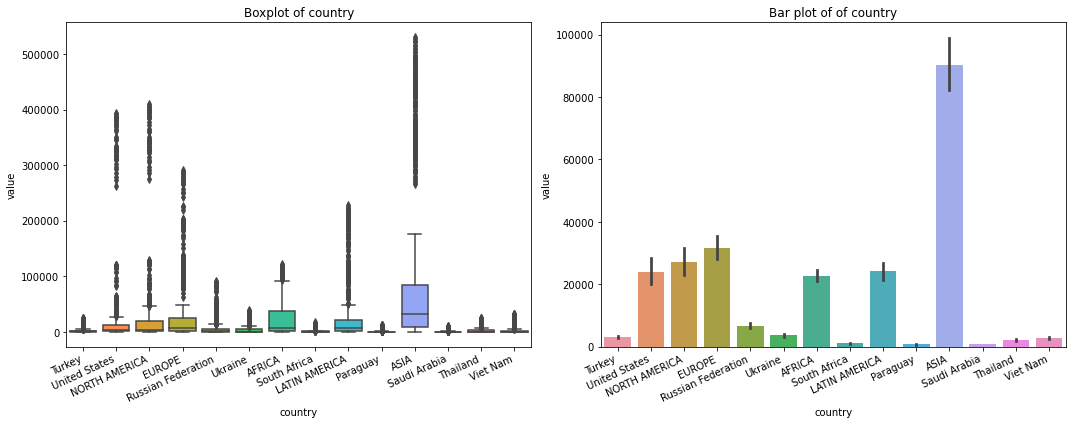

In [25]:
# Analyze the crop production by country
plotchart(crop_dataframe['country'], crop_dataframe['value'])

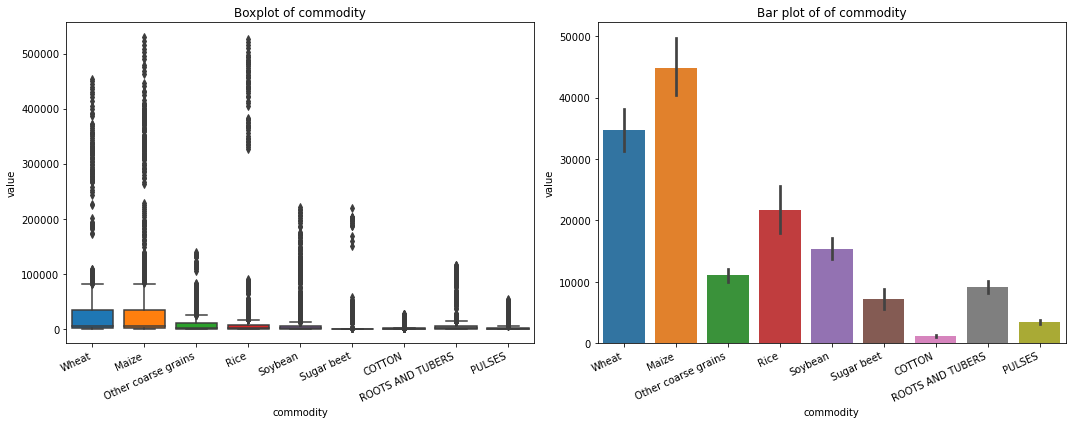

In [26]:
 # Analyze the crop production by commodity type
plotchart(crop_dataframe['commodity'], crop_dataframe['value'])

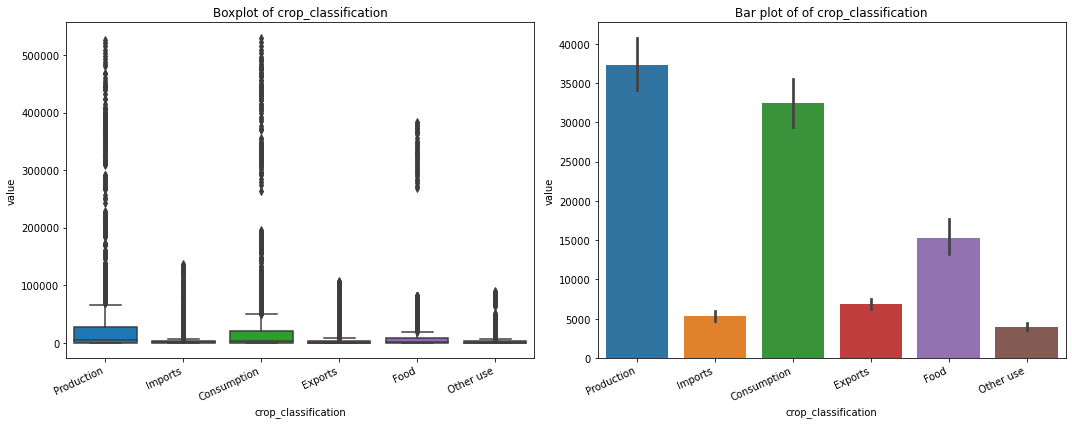

In [27]:
# Analyze the crop production by crop_classification
plotchart(crop_dataframe['crop_classification'], crop_dataframe['value'])

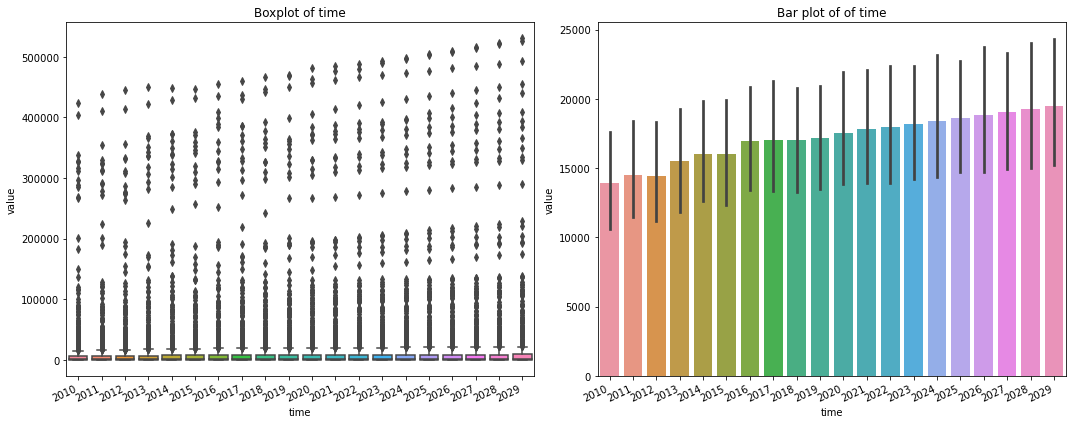

In [28]:
# Analyze the crop production by time period
plotchart(crop_dataframe['time'], crop_dataframe['value'])

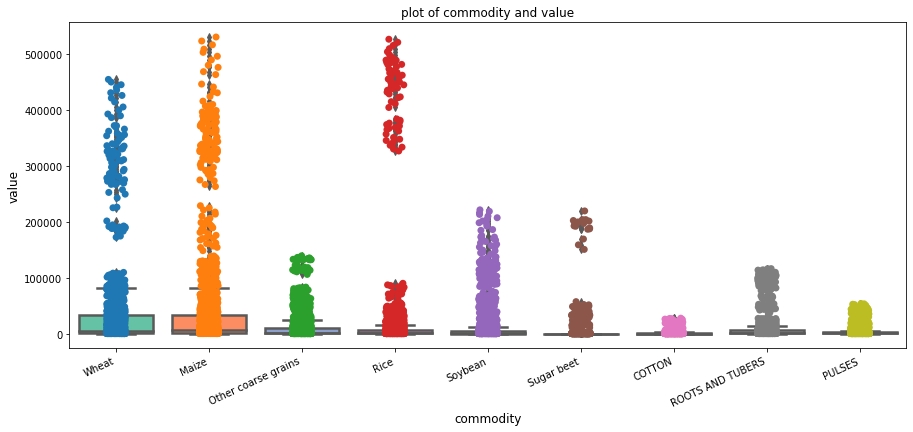

In [29]:
# Want to see how the crop production distribution looks with two chart stack plot
twochartplot_funct(crop_dataframe['commodity'], crop_dataframe['value']) 
#plt.show()

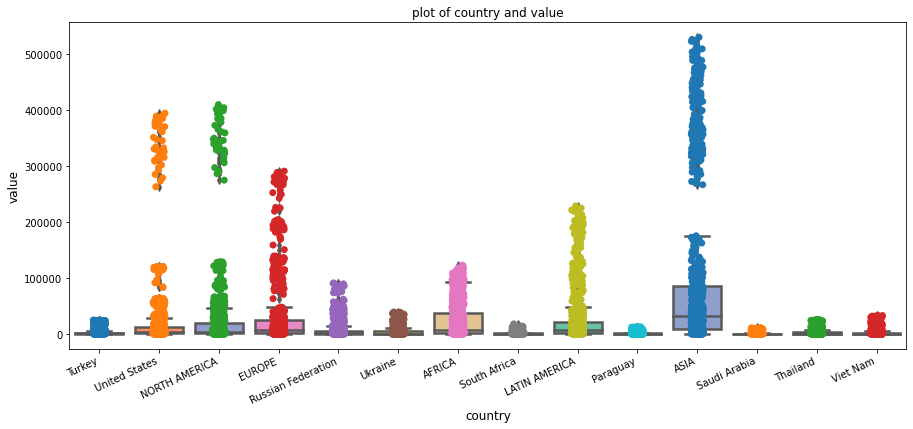

In [30]:
# Want to see how the crop production distribution looks with two chart stack plot
twochartplot_funct(crop_dataframe['country'], crop_dataframe['value']) 
#plt.show()

### 3.3 Want to See If There Is a Relationship Between the Variables

In [31]:
# Cheching for the correlation between the data points
crop_dataframe.corr()

,value
value,1.0


### 3.4 A Look at the Projected Crop Production Increases

In [32]:
# The highest volumes of crop production sorted by value will be place on the top
print('The highest volumes of crop production are placed on the top of the list') 
crop_dataframe.sort_values(by=['value'], ascending=False).head(10)

The highest volumes of crop production are placed on the top of the list


,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
4939,ASIA,MA,Maize,QC,Consumption,2029,Tonnes,530240.76
10699,ASIA,RI,Rice,QP,Production,2029,Tonnes,526284.53
4938,ASIA,MA,Maize,QC,Consumption,2028,Tonnes,523110.52
10698,ASIA,RI,Rice,QP,Production,2028,Tonnes,520762.71
4937,ASIA,MA,Maize,QC,Consumption,2027,Tonnes,516320.75
10697,ASIA,RI,Rice,QP,Production,2027,Tonnes,515148.34
10696,ASIA,RI,Rice,QP,Production,2026,Tonnes,509478.79
4936,ASIA,MA,Maize,QC,Consumption,2026,Tonnes,508560.02
10695,ASIA,RI,Rice,QP,Production,2025,Tonnes,503856.82
4935,ASIA,MA,Maize,QC,Consumption,2025,Tonnes,502869.53


In [33]:
# The lowest volume of crop production sorted by value will be displayed at the bottom
#print('The lowest volume of crop production sorted by time period will be displayed at the top of the list')
#crop_dataframe.sort_values(by=['value'], ascending=False).tail(10)

In [34]:
# The highest volumes of crop production sorted by value will be place on the top
print('The highest volumes of crop production are placed on the top of the list') 
crop_dataframe.sort_values(by=['time'], ascending=True).head(10)

The highest volumes of crop production are placed on the top of the list


,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value
180,Turkey,WT,Wheat,QP,Production,2010,Tonnes,19674.000
63900,United States,CT,COTTON,IM,Imports,2010,Tonnes,1.960
63880,United States,CT,COTTON,QP,Production,2010,Tonnes,3941.686
63820,Turkey,CT,COTTON,EX,Exports,2010,Tonnes,31.825
63800,Turkey,CT,COTTON,QC,Consumption,2010,Tonnes,1300.000
2400,Thailand,WT,Wheat,EX,Exports,2010,Tonnes,9.988
63780,Turkey,CT,COTTON,IM,Imports,2010,Tonnes,729.428
63760,Turkey,CT,COTTON,QP,Production,2010,Tonnes,816.705
26960,Viet Nam,SBE,Sugar beet,EX,Exports,2010,Tonnes,0.000
26940,Viet Nam,SBE,Sugar beet,QC,Consumption,2010,Tonnes,0.000


### 3.5 Analyze Year Over Year Percent Change of Crop Production Forecast for all Commodity Types 

In [35]:
# find the percentage change in crop production from one year to the next
crop_dataframe.sort_values(by=['time'], ascending=False)
crop_dataframe = crop_dataframe.assign(pct_change = 
                                       lambda x: crop_dataframe.groupby('commodity')['value'].pct_change())
crop_dataframe.head()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value,pct_change
180,Turkey,WT,Wheat,QP,Production,2010,Tonnes,19674.0,NaN
181,Turkey,WT,Wheat,QP,Production,2011,Tonnes,21800.0,0.108061
182,Turkey,WT,Wheat,QP,Production,2012,Tonnes,20100.0,-0.077982
183,Turkey,WT,Wheat,QP,Production,2013,Tonnes,22050.0,0.097015
184,Turkey,WT,Wheat,QP,Production,2014,Tonnes,19000.0,-0.138322


In [36]:
# Create a new dataset to include year over year crop production percent changes
print_tofile= open("cropdata.txt","w+")
print_tofile = crop_dataframe.to_csv("cropdata.txt", header=0, index=None, sep=',', mode='w')

### 3.6 A Look at Crop Production Percent Increase for the Forecast Period 2021 to 2029

In [37]:
# A look at the crop production increase for the forecast period 2021 to 2029
interval = ['2020', '2021', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029']
pct_change_df = crop_dataframe[crop_dataframe['time'].isin(interval)]

#pct_change_df = forecast_dataframe.assign(pct_change = 
                                          #lambda x: crop_dataframe.groupbby('commodity')['value'].pct_change())
pct_change_df.head()

,country,commodity_code,commodity,crop_classification_code,crop_classification,time,unit,value,pct_change
190,Turkey,WT,Wheat,QP,Production,2020,Tonnes,20856.132,0.097691
191,Turkey,WT,Wheat,QP,Production,2021,Tonnes,21132.437,0.013248
192,Turkey,WT,Wheat,QP,Production,2022,Tonnes,21393.569,0.012357
193,Turkey,WT,Wheat,QP,Production,2023,Tonnes,21687.091,0.013720
194,Turkey,WT,Wheat,QP,Production,2024,Tonnes,22016.689,0.015198


## Step 4: Insights

In [38]:
# This function is used to visualized crop production insights using bar plot
def bar_plot(xcolumn, ycolumn):
    plt.figure(figsize=(15, 6))
    #sns.lineplot(data=crop_dataframe, x=xcolumn, y=ycolumn, hue='commodity') 
    plot_order = pct_change_df.groupby(xcolumn.name)[ycolumn.name].sum()
    #sns.catplot(data=crop_dataframe, x=xcolumn.name,  y=ycolumn.name,kind='bar', ci=None)
    ax_value = sns.barplot(data=pct_change_df, x=xcolumn.name, y=ycolumn.name, 
                           order=plot_order.sort_values(ascending=False).index, ci=None) 
    for barlabel in ax_value.patches:
        ax_value.annotate(format(barlabel.get_height(), '.0f'), 
                      (barlabel.get_x() + barlabel.get_width() / 2,
                       barlabel.get_height()), ha='center', va='bottom',
                       xytext=(0, 5), textcoords='offset points')
    plt.xlable = xcolumn.name
    plt.ylable = ycolumn.name
    plt.title('Analysis of ' + xcolumn.name + ' and ' + ycolumn.name) 
    labels = plt.xticks(rotation=25)
    
    
    plt.show()

In [39]:
# This function is used to plot line charts of year year over year production Values
def line_plot(xcolumn, ycolumn, plt_kwargs={}): 
    plt.figure(figsize=(15,6))

    sns.lineplot(data=crop_dataframe, x=xcolumn, y=ycolumn, **plt_kwargs) 
    plt.xlable = xcolumn.name
    plt.ylable = ycolumn.name
    plt.title('Analysis of ' + xcolumn.name + ' and ' + ycolumn.name)
    labels = plt.xticks(rotation=25)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=3)
    
    plt.show()

In [40]:
# This function is used to plot line charts of year year over year production changes
def line_plot_ofdelta(xcolumn, ycolumn, plt_kwargs={}): 
    plt.figure(figsize=(15,6))
    
    sns.lineplot(data=pct_change_df, x=xcolumn, y=ycolumn, **plt_kwargs)
    plt.xlable = xcolumn.name
    plt.ylable = ycolumn.name
    plt.title('Analysis of ' + xcolumn.name + ' and ' + ycolumn.name)
    labels = plt.xticks(rotation=25)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), shadow=True, ncol=3)
    
    plt.show()

In [41]:
# Function to calculate of each variable as a percentage of the total crop productions
def percentof_total(xcolumn):
    data = pct_change_df.groupby(xcolumn)['value'].sum() 
    data
    data_per = data.groupby(xcolumn).agg(percentage =lambda p: p.sum() / data.sum() * 100)
   
    #sns.set_style("whitegrid")
    bar,ax = plt.subplots(figsize=(10,6))
    ax = sns.barplot(x=data_per.index, y='percentage', data=data_per, 
                     ci=None, palette='tab20')
    
    ax.set_title('Percent of Total Crop Productions by ' + xcolumn, fontsize=12) 
    ax.set_xlabel = xcolumn # ("Commodity Type")
    ax.set_ylabel ("Percentage")
    plt.setp(ax.get_xticklabels(), rotation=25, ha='right', rotation_mode='anchor')
    
    # calculate the percentages and annotate the sns barplot
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2,rect.get_height(), 
                "%.1f%%"% rect.get_height(), ha='center', va='bottom') 
   
    plt.show()

In [42]:
# function to plot a pie chart of the data points
def pie_chart(xcolumn):
    data = pct_change_df.groupby(xcolumn)['value'].sum().sort_values(ascending=False)
    data
    pie, ax = plt.subplots(figsize=[8,4])
    labels = data.keys()

    ax.pie(x=data, autopct="%.1f%%",explode=[0.2]*(len(data)), labels=labels, 
           pctdistance=0.9, rotatelabels=True, shadow=True, radius=1.6, 
           startangle=230, labeldistance=1.2) 
    
    plt.title('Percentage of Total Crop Productions by ' + xcolumn, fontsize=12, pad=160) 
    
    #textprops={'size': 'smaller'}
    plt.show()

### 4.1 Trend Analysis of the Predicted Crop Production

#### 4.1.1 Analysis of the crop production distribution

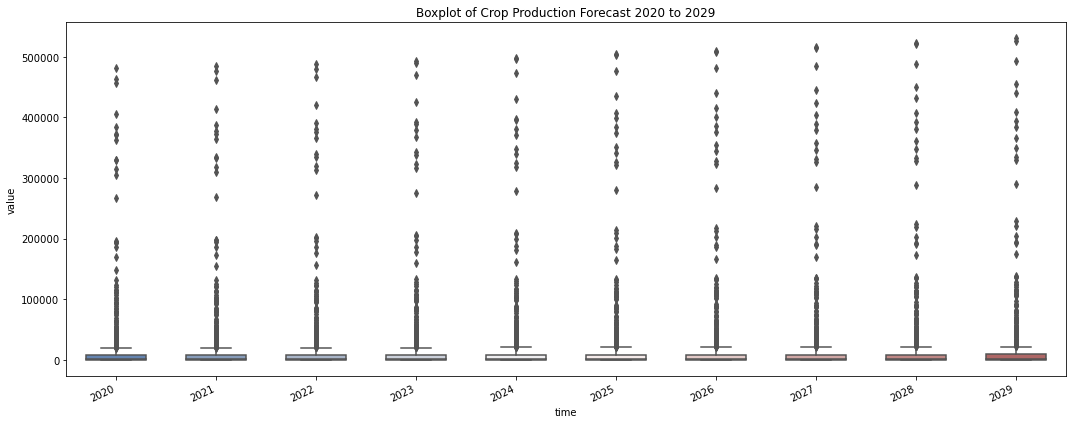

In [43]:
# Checking for the overall distribution of the crop production during the forecast peri
plt.figure(figsize=(15, 6))
sns.boxplot(x='time', y='value', orient='v', data=pct_change_df, saturation=0.75, width=.6, palette='vlag')

plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Boxplot of Crop Production Forecast 2020 to 2029')
plt.xticks(rotation=25, horizontalalignment='right')
plt.tight_layout() 

plt.show()

**There is evidence of production increases with all the outliers out in the upper bound of the interquartile and there are no outliers in the lower bound of the interquartile.**
- Too many outliers that are all relevant therefore removing the outliers will render the analysis meaningless.
- The outliers form a positive linear pattern.

Crop Productions Historical and Forecast Combined


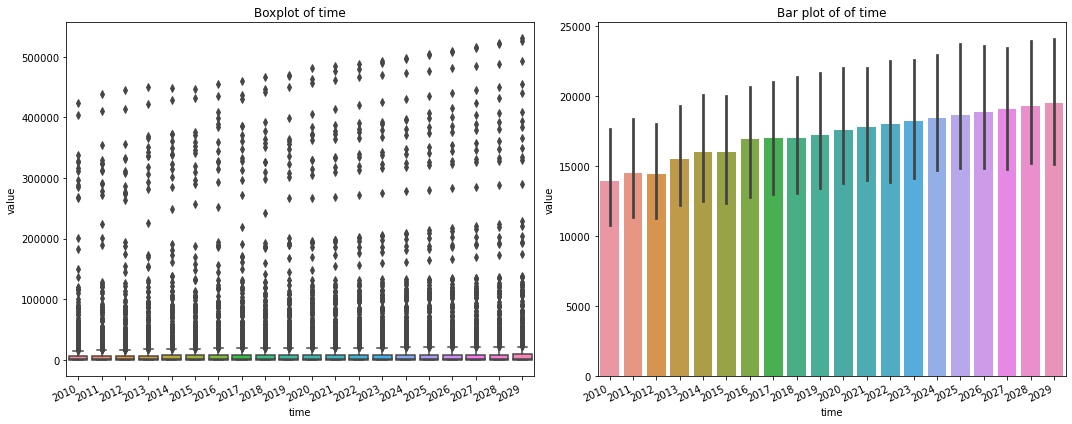

Crop Production Distribution and Growth During Forecast Period 2020-2029


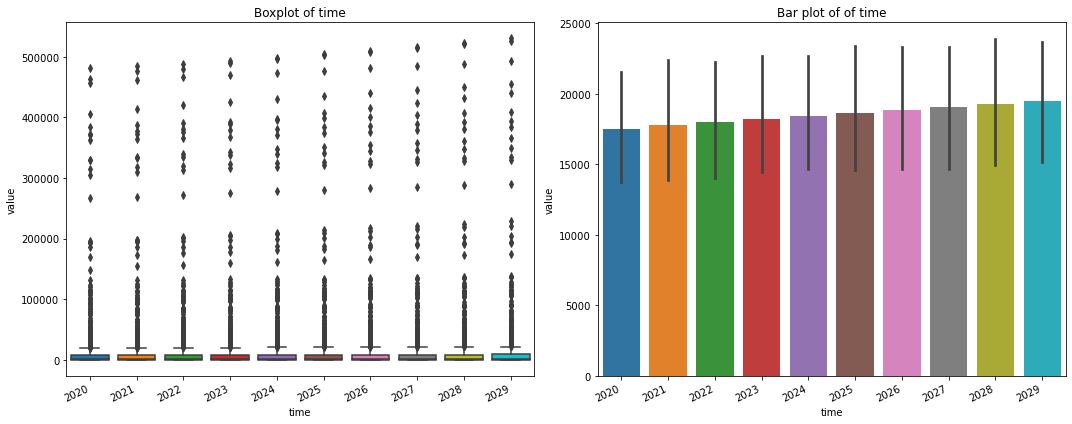

In [44]:
# Visualization of the crop production relative to time period
print('Crop Productions Historical and Forecast Combined')
plotchart(crop_dataframe['time'], crop_dataframe['value'])
print('Crop Production Distribution and Growth During Forecast Period 2020-2029')
plotchart(pct_change_df['time'], pct_change_df['value'])

**All though the boxplot of the crop production reveals an inequitable distribution of the production volumes, there are too many outliers over the whiskers that must not be removed to deliver meaningful analysis. The bar plot conclusively shows crop productions going up every year which is also verified by correlation coefficient of one obtained from correlation calculations.**

#### 4.1.2 Crop Production Trends from a Global View Point

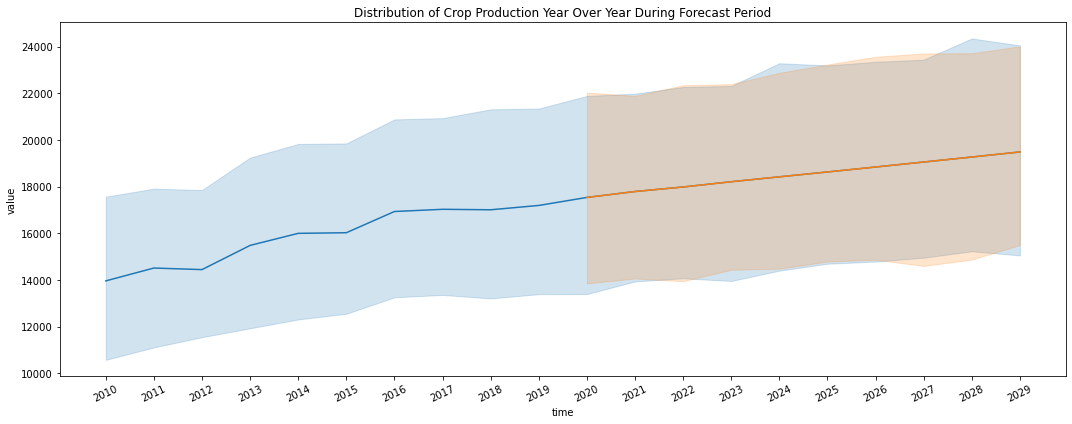

In [45]:
# Trend Analysis of historical and forecasted crop production by commodity worldwide 
#line_plot(crop_dataframe['time'], crop_dataframe['value']) is not used  
sns.lineplot(data=crop_dataframe, x='time', y='value')
plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Analysis of historical and Forecasted Crop Production Worldwide')

# Checking for the overall distribution of the crop production plt.figure(figsize=(15, 6))
sns.lineplot(x='time', y='value', data=pct_change_df)
plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Distribution of Crop Production Year Over Year During Forecast Period') 
labels = plt.xticks(rotation=25)
plt.tight_layout() 

plt.show()

**The Crop productions look to have experienced some ups and downs through out the years but forecasted crop productions seems to follow a consistant positive growth from 2020 to 2029.**

Key take away:
1. Are smaller than prior years in which the forecast is modeled against
2. Year over year (YOY) worldwide have positive projections, it only provide a macro view of crop
productions outputs
3. Will need to be reviewed to see where the hits and misses lays in the forecast.

#### 4.1.3 Historical and Forecasted Crop Production by Country

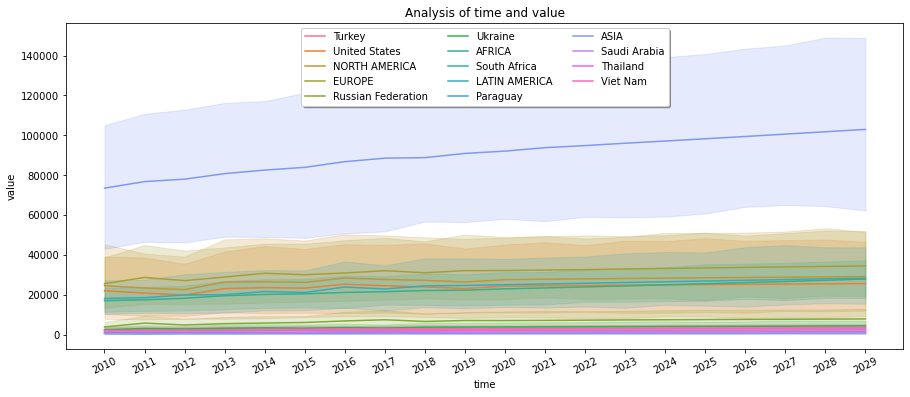

In [46]:
# Trend Analysis of crop production by country
plt_param={'hue': 'country'}
line_plot(crop_dataframe['time'], crop_dataframe['value'], plt_kwargs=plt_param) 
#sns.lineplot(data=crop_dataframe, x='time', y='value', hue='country') 
#plt.xlable = 'time'
#plt.ylable = 'value'
#plt.title('Analysis of Forecasted Crop Production by Country')
#labels = plt.xticks(rotation=25)

**The yearly crop yields seemes to be stable from 2010 to 2019 with modest deviation for some countries.**

Key observations to note:
1. To the exception of Saudi Arabia, Thailand and Viet Nam, the entire Asian continent crop production is aggregated under Asia country. Farther analysis of the macro volumes will be needed to determine the values for specific regions in Asia, the same approach will be needed for each continent's yearly crop values.
2. Asia produce more than 1/3 of the entire world crop production
3. Viet Nam and Thailand seems to deliver the most consistent volumes year over year
4. Saudi Arabia has the lowest production levels of all OEDC countries

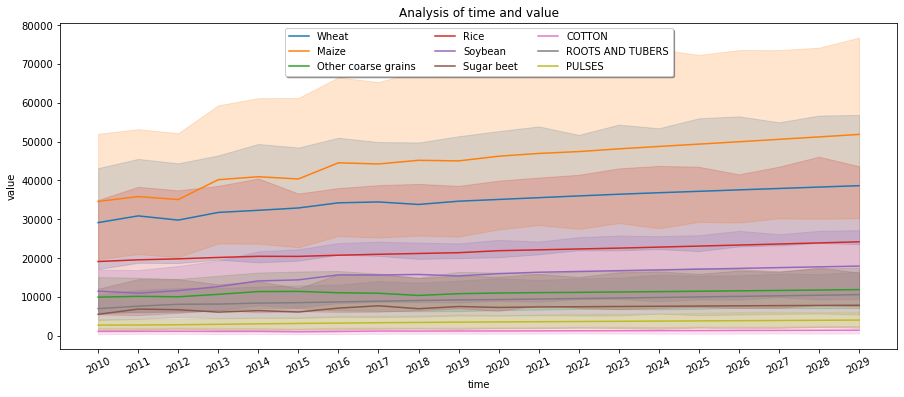

In [47]:
# Trend Analysis of crop production by commodity
plt_param={'hue': 'commodity'}
line_plot(crop_dataframe['time'], crop_dataframe['value'], plt_kwargs=plt_param)

**There are definitely certain crop types that dominate year over year (yoy) both on historical and projected stands:**
1. Maize has been and continues to be the highest produced crop, followed by Wheat, then Rice YOY.
2. Cotton production seems to be flat from 2010 through 2020 and the same trend continues to the end of the forecast period.
3. Evaluation of the production volumes yoy will be more meantingful than looking at the trend tracks. Here the commodities visually show both historical and projected flat growth
4. Other coarse grains productions dropped after 2016 and are not forecasted (2020-2029) to get back to pre 2016 values.

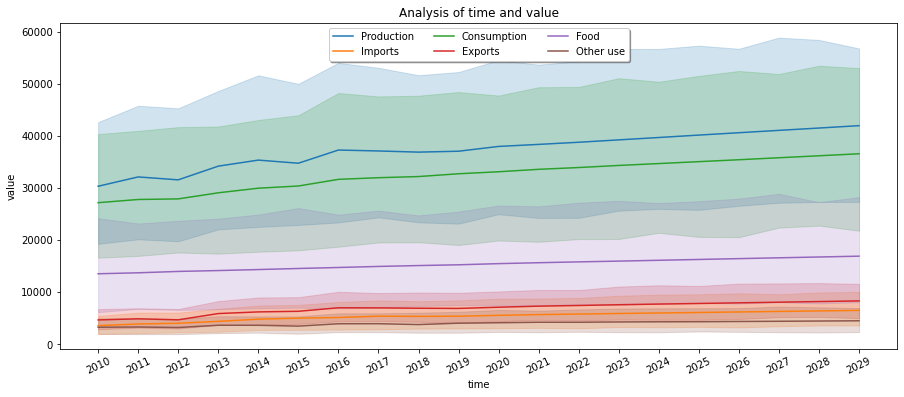

In [48]:
# Trend Analysis of crop production by crop classification
plt_param={'hue': 'crop_classification'}
line_plot(crop_dataframe['time'], crop_dataframe['value'], plt_kwargs=plt_param)

**The Global view of crop classifications shows each group's values consistantly increasing. But given that crop products are commodities and internationally traded, the crop yield values assigned to a classification changes relative to a country's total production capabilities.**
A couple of key take away:
1. More than 2/3 of worldwide crop production is classificed/allocated for consumption
2. Exports and Imports marginally started to go up in 2013 and the same trends are true in the projections

### 4.2 Crop Production Ranking

#### 4.2.1 Lowest and Highest Crop Production Values by Commodity Type

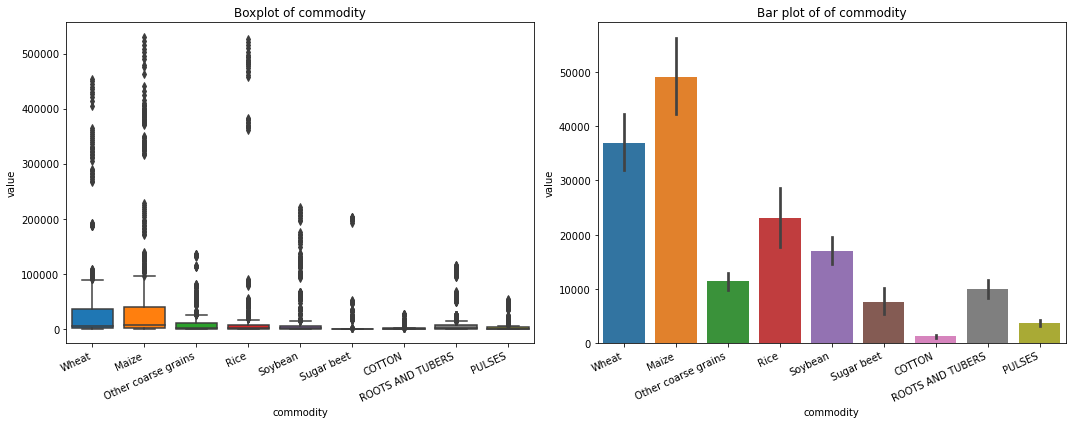

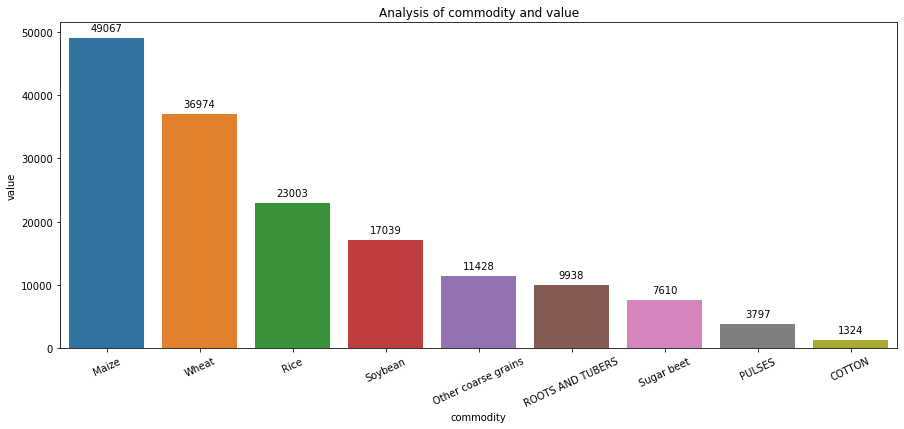

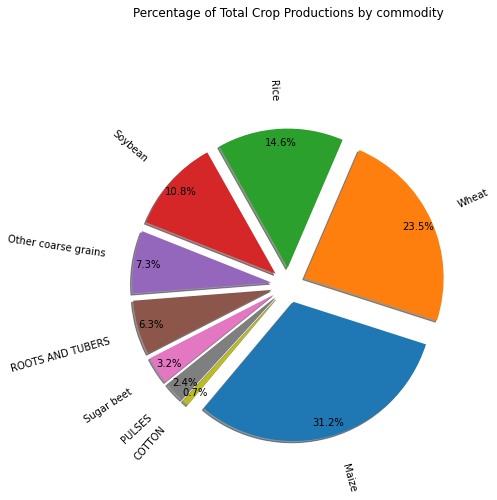

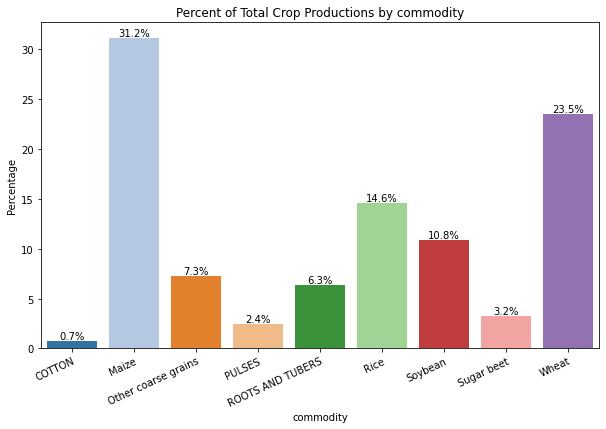

In [49]:
# From highest to lowest Crop productions during the forecast period
plotchart(pct_change_df['commodity'], pct_change_df['value']) 
bar_plot(pct_change_df['commodity'], pct_change_df['value'])
#groupby the data by commodity type to get percent share of total productions
pie_chart('commodity')
percentof_total('commodity')

**Other coarse grains, roots and tubers, and pulses are not shown to be produced in large volumes as single aggregates of different types of crops.**

Most of the world’s crop production is centered around three to four crop categories:
1. Maize is the world largest crop production.
2. Wheat is second biggest.
3. Rice is third most produced and Soybean is fourth.
4. Cotton is the least crop produced and Pulses are second to last.

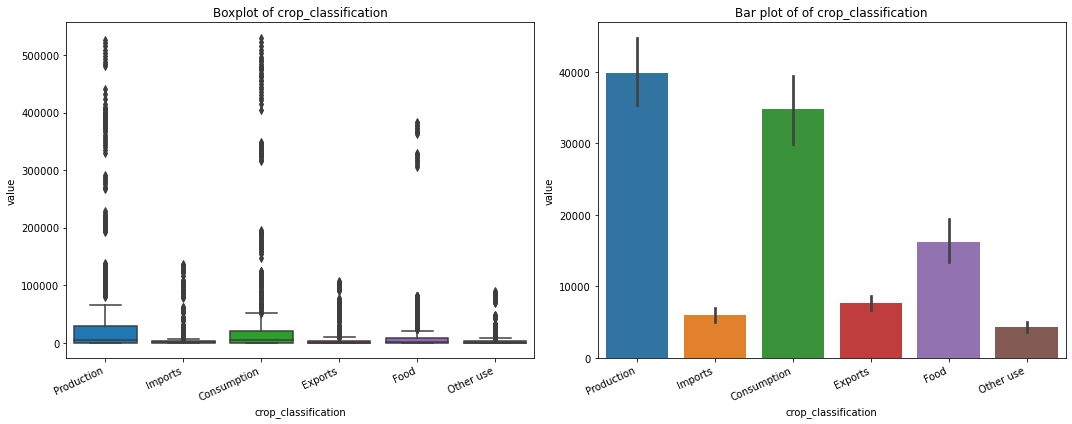

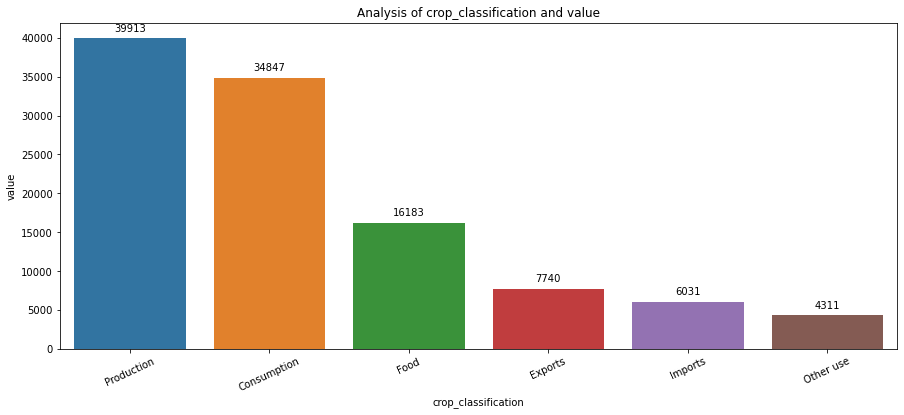

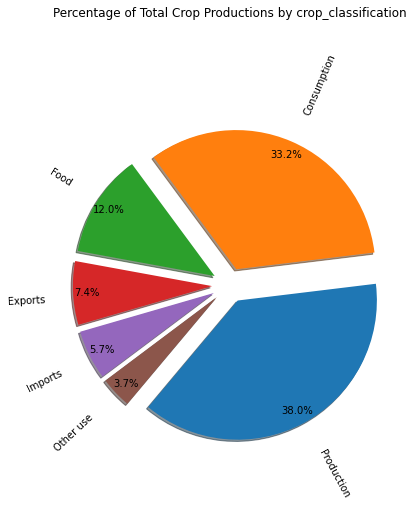

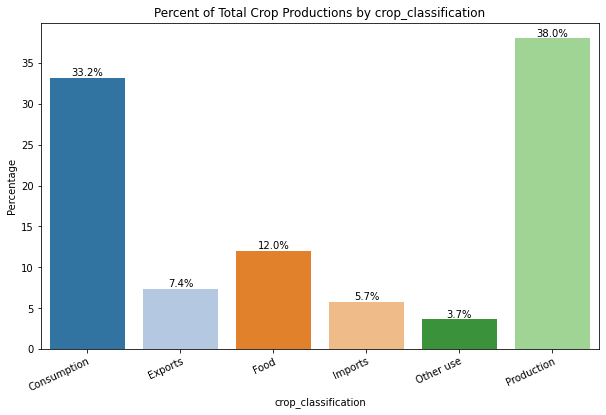

In [50]:
# From highest to lowest Crop productions during the forecast period
plotchart(pct_change_df['crop_classification'], pct_change_df['value']) 
bar_plot(pct_change_df['crop_classification'], pct_change_df['value'])
#groupby the data by crop classification to get percent share of total productions 
pie_chart('crop_classification')
percentof_total('crop_classification')

**The Worldwide crop production classifications are of great importance for more detail analysis at the country view to determine where each countries fit in the crop production
distribution channels.**

Two key observations:
1. Rightfully so, consumption is a large lump of the crop production.
2. Exports, Imports, and Other use are all three combined less than 30000 Tonnes of the entire
worldwide crop productions.

#### 4.2.2 Countries with the Lowest and Highest Crop Production Values

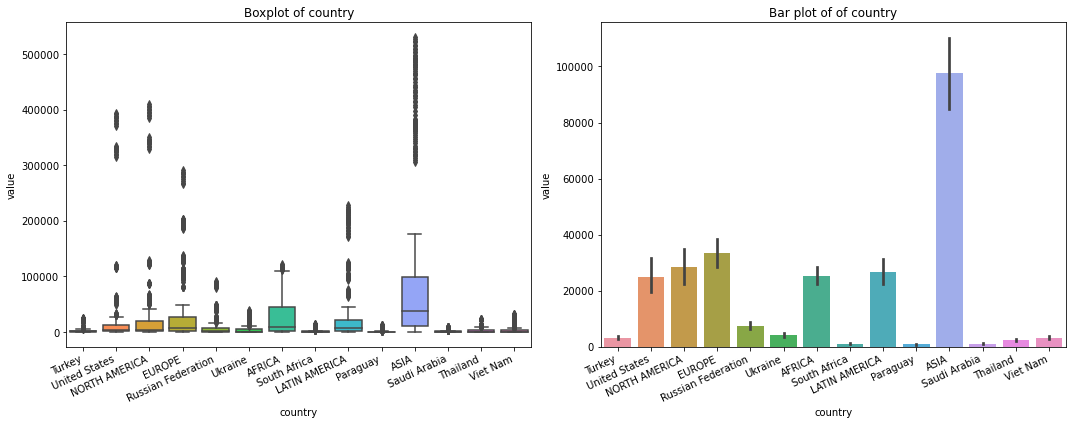

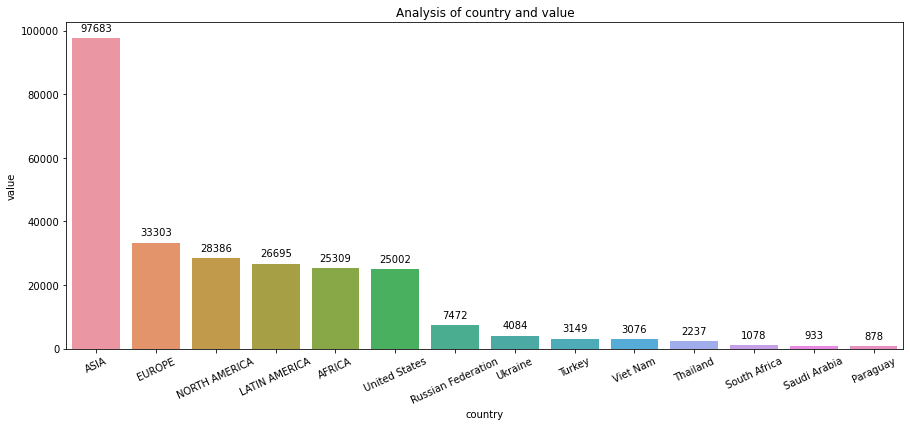

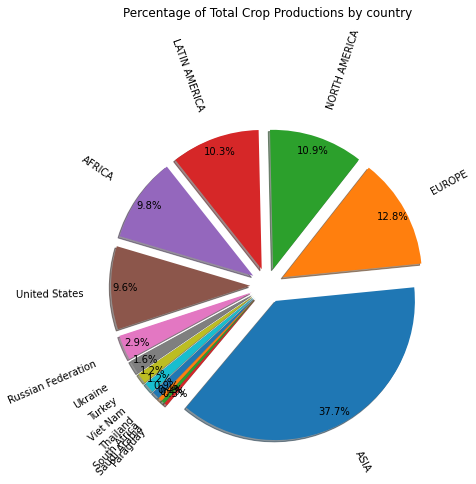

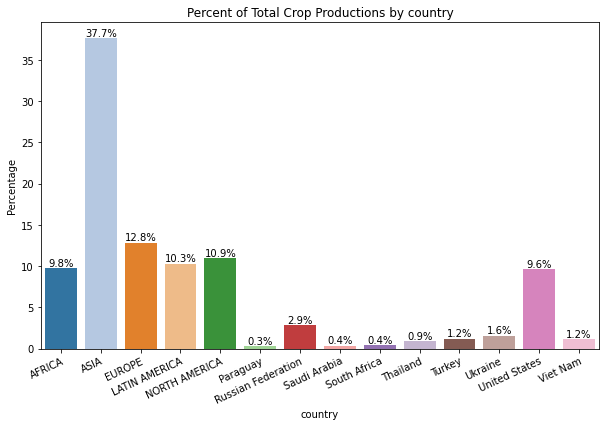

In [51]:
# From the highest to lowest producing countries during the forecast period
plotchart(pct_change_df['country'], pct_change_df['value']) 
bar_plot(crop_dataframe['country'], crop_dataframe['value'])
#groupby the data by commodity type to get percent share of total productions 
pie_chart('country')
percentof_total('country')

**Asia is the world largest crop producer for volumes that are more than twice Europe’s, North America, Latin America, and the United States' output.
Saudi Arabia’s and Paraguay's crop productions are close to nothing (less than 1000Tonnes) compared to the rest of the countries.**

Main Point with respect to the countries crop productions:
1. Africa's crop productions is lagging behind all major countries that are equal or less in surface area and are similar in climate.
2. How are each country's productions grouped (classified) which could be answered with additional analysis.

### 4.4 Year Over Year Percent Change of Crop Production Forecast for all Commodity 


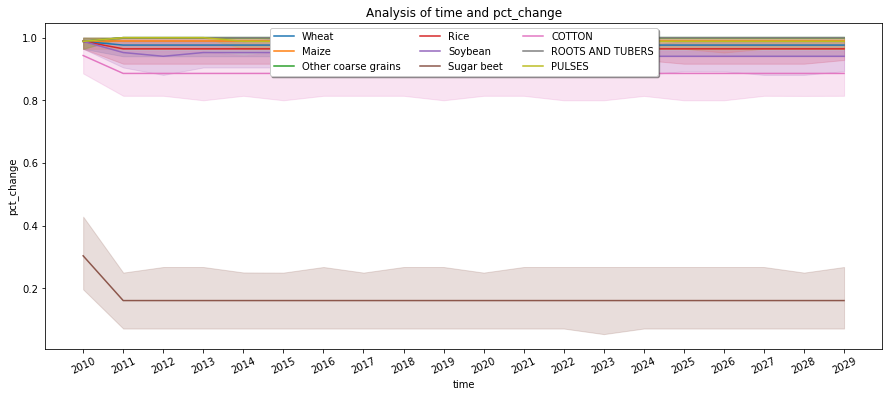

In [52]:
# Year over year growth from 2010 to 2029 for all commodity types
plt_param={'hue': 'commodity'}
line_plot(crop_dataframe['time'], crop_dataframe['pct_change'].notnull(), 
          plt_kwargs=plt_param)

**There are no meaningful insights that can be drown from the trend analysis from this view since all the forecasted increases seems to be of equal values for all the commodity types. Overall, Sugar beet's volumes forecast is the lowest and stayed less than 40% every year historically and in the projections.**

****

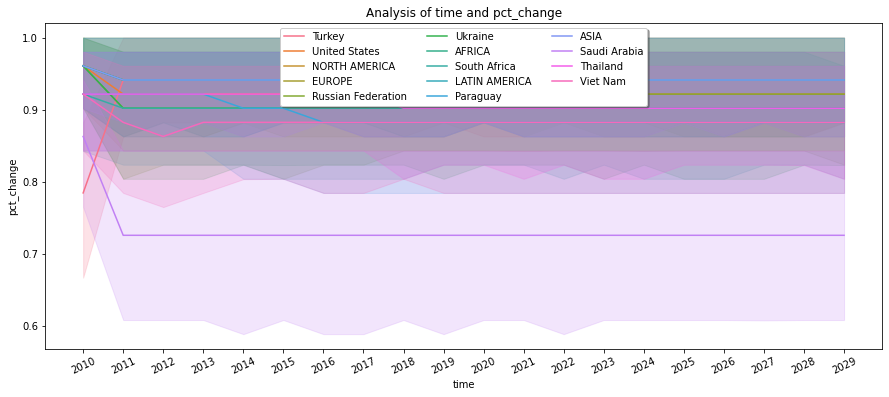

In [53]:
# Year over year growth from 2010 to 2029 for the countries
plt_param={'hue': 'country'}
line_plot(crop_dataframe['time'], crop_dataframe['pct_change'].notnull(), 
          plt_kwargs=plt_param)

**There looks to be a drop in crop productions across all countries in 2011 and the forecast looks flat for 2020 to 2029. Almost all countries increase their productions by more than 85% apart from Saudi Arabia from the looks of it. Farther Analysis of the forecast period only should provide better insights.**

****

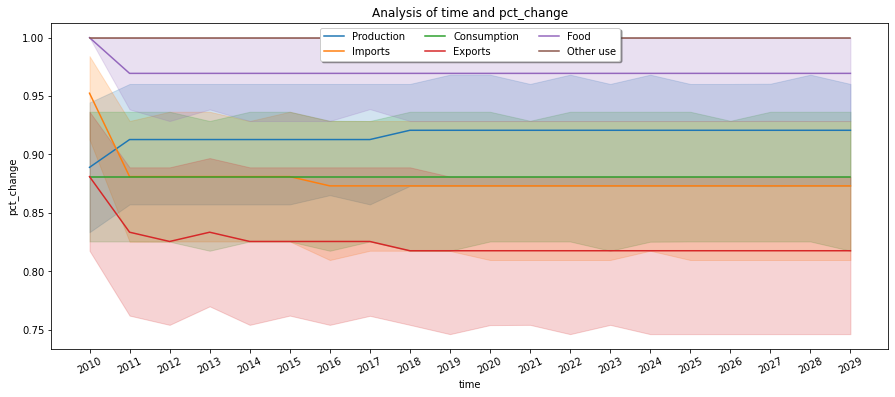

In [54]:
  
# Year over year growth from 2010 to 2029 for all crop classifications
plt_param={'hue': 'crop_classification'}
line_plot(crop_dataframe['time'], crop_dataframe['pct_change'].notnull(), 
          plt_kwargs=plt_param)

**There is a lot more inconsistences with the export values during 2010 to 2016 whereas the consumptions volumes look to stay flat.**

One key observation of the crop classifications:
- Production will be analysed in future study to see if it is the aggregation of exports and consumptions. Various valuations of the crop classification categories should provide clarity.

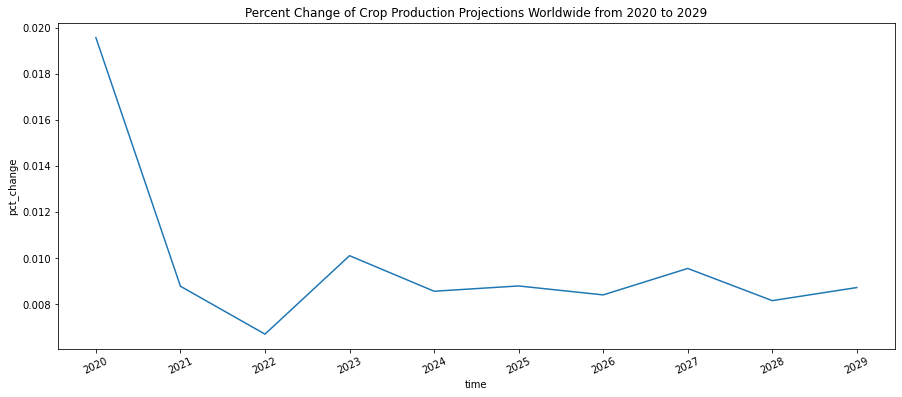

In [55]:
# Trend of Projected Crop Production Percent Growth for the period between 2020 to 2029
sns.lineplot(data=pct_change_df, x=pct_change_df['time'], y=pct_change_df['pct_change'])
plt.xlable = 'time'
plt.ylable = 'value'
plt.title('Percent Change of Crop Production Projections Worldwide from 2020 to 2029') 
labels = plt.xticks(rotation=25)
plt.show()

**At a macro level, the forecast for 2020 to 2022 are drastically lower than the historical crop productions values, which may be expected (for 2020-2022) with the reductions of agricultural activities and global trade due to pandemic and other underlying assumptions for the forecast values are not know.**

**From 2023 on to 2029, the projected crop production fluctuates up/down one year after next.**

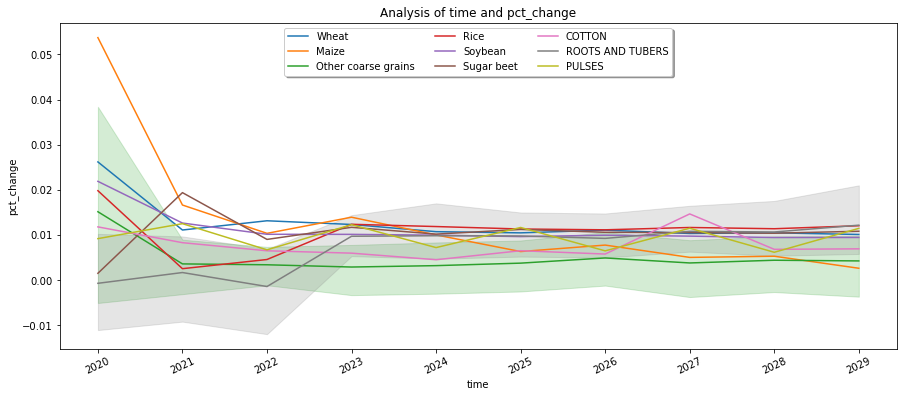

In [56]:
# A Closer Look at Projected Crop Production Percent Growth for the period between 2020 to 2029
plt_param={'hue': 'commodity'}
line_plot_ofdelta(pct_change_df['time'], pct_change_df['pct_change'], plt_kwargs=plt_param)

**Even with projected decreases production levels for Rice and Roots and Tubers from 2020 to 2022 they are still the crop productions with the greatest growth in volumes year over year until 2029.**

**Forecast for Maize productions is drastically lower than historical outputs and will need to be reviewed to see where some of the deviations may be in the forecast (missing data or forecast assumptions at this point).**

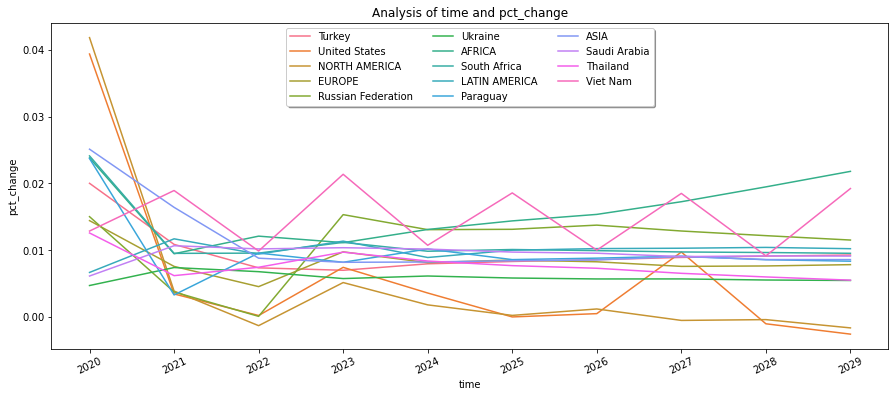

In [57]:
# A Closer Look at Projected Crop Production Percent Growth for the period between 2020 to 2029
plt_param={'hue': 'country'}
line_plot_ofdelta(pct_change_df['time'], pct_change_df['pct_change'], plt_kwargs=plt_param)

**There are almost complete shifts in productions volumes from the United States and North America in the crop production predictions from 2020 to 2029; the forecasts get lowered year after year.**

**Saudi Arabia do not seem to have plans to ramp up their productions given the projected crop production values.**

**Thailand looks to controlled projected crop production system, up one year down the next year which is not consistent with agricultural practices of OECD-FAO participating countries.**

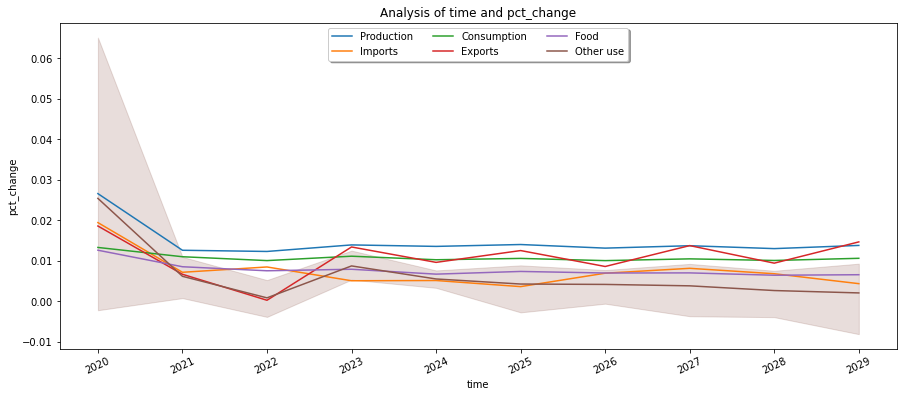

In [58]:
# Year over year growth from 2020 to 2029 for crop classification
plt_param={'hue': 'crop_classification'}
line_plot_ofdelta(pct_change_df['time'], pct_change_df['pct_change'], plt_kwargs=plt_param)

**There are many variations in the crop classifications forecast, Exports are projected to fall stiffly in 2020 but they are estimated to increase past all the other groups such as Imports and Consumptions.**

**It is worth noting Other use category forecast for 2022 is in line with that of Exports group, and it is the group with the least forecasted growth.**

## Sources:
Used these websites to complete this project for the crop production:

Student course materials (restricted access) link: https://www.springboard.com/

Tutorial on how to add text labels to plots: link:
https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

Got the code to add label the bar plot from: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

Link: https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples 

Tutorial to create world map link: https://opensource.com/article/20/4/python-map-covid-19 

Seaborn plot tutorial: Link: https://seaborn.pydata.org/generated/seaborn.lineplot.htmll

Link: https://seaborn.pydata.org/generated/seaborn.catplot.html

Great tutorial link: https://plotly.com/python/mapbox-layers/

Helpful tutorial link: https://www.datacamp.com/community/tutorials/functions-python-tutorial
  
Creating custom plotting function Def link: https://towardsdatascience.com/creating-custom-plotting-functions-with-matplotlib-1f4b8eba6aa1

Python tutorial with sample codes link: https://www.w3schools.com/python/default.asp

Modified pie plot code from this link: https://www.dataforeverybody.com/matplotlib-seaborn-pie-charts/